In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", attrs={"class": "wikitable collapsible collapsed"})
df = tmp[3]

In [113]:
#Вивести перші рядки таблиці за допомогою методу head
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [114]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(df.shape)

(28, 9)


In [115]:
#Замініть у таблиці значення "—" на значення NaN
df.replace('—', np.NaN, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [116]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [117]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df[['2014', '2019']] = df[['2014', '2019']].astype(float)
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [118]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [119]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df.drop(27, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [120]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126  111.4   80.2
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0   80.2
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0   80.2
12          Львівська  23

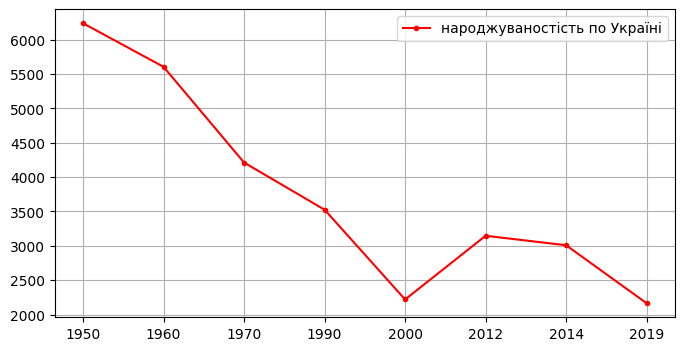

In [121]:
#Загальна народжуваностість по Україні 1950/1960/1970/1990/200/2012/2019
d =  df[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].sum()
x = d.index.tolist()
y = d.values
plt.figure(figsize=(8, 4))
plt.plot(x, y, color="red", label="народжуваностість по Україні", marker=".")
plt.legend()
plt.grid();

In [122]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
df[df['2019'] > df['2019'].mean()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.4,80.2
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,80.2
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
11,Луганська,262.0,235.0,144.0,116,62,96,51.0,80.2
12,Львівська,234.0,240.0,171.0,140,91,119,119.0,87.0
14,Одеська,241.0,192.0,148.0,126,80,127,123.0,88.0
16,Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0
20,Херсонська,208.0,214.0,166.0,143,85,117,115.0,81.0


<BarContainer object of 27 artists>

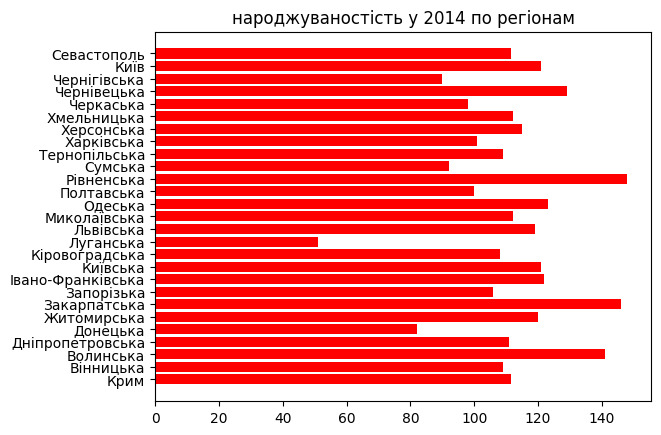

In [123]:
#У якому регіоні була найвища народжуваність у 2014 році?
df[df['2014'] == max(df['2014'])]
x = df['Регіон'].values
y = df['2014'].values

fig, ax = plt.subplots()
ax.set_title("народжуваностість у 2014 по регіонам")
ax.barh(x, y, color="red", label="народжуваностість у 2014 по регіонам")



<Axes: title={'center': 'діаграма народжуваності по регіонах у 2019 році'}>

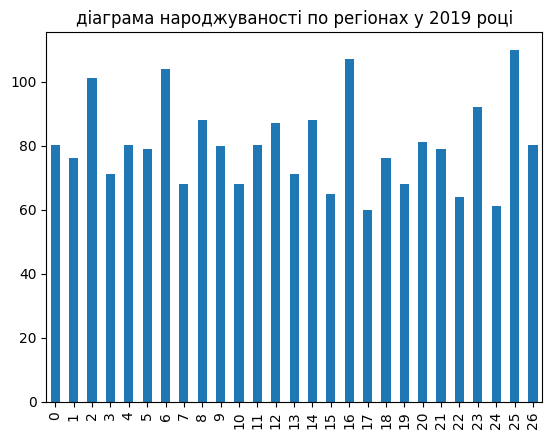

In [124]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
df['2019'].plot(kind='bar', title='діаграма народжуваності по регіонах у 2019 році')